In [1]:
from motifs.utils import load_tokens_from_directory
from motifs.features import transform_corpus_to_ngrams
import pandas as pd
import time
from motifs.config import LOGGER
from motifs.utils import build_window_corpus

# corpus_path = PKG_DATA_PATH.joinpath('corpus_test')

tokens_dir = "demo/20231025_162248_pipeline/tokens"

# tokens_dir = "demo/20231027_115357_pipeline_corpus_test/tokens"
token_type = "motif"
n = 7

tokens = load_tokens_from_directory(tokens_dir)
tokens.rename({token_type: "token", "piece": "doc"}, axis=1, inplace=True)

ngrams = transform_corpus_to_ngrams(tokens, n)
# ngrams = pd.read_csv(f"demo/20231027_171027_pipeline/ngram_{n}.csv")

In [2]:
# Transform to context data frame
from motifs.plots import facet_bar_plot
data = build_window_corpus(ngrams, 10)

In [3]:
data["text"][data["window"] == 0]

0                    Prologue Ce livre est avant tout l'
1                    Ce livre est avant tout l' histoire
2                    livre est avant tout l' histoire d'
3                       est avant tout l' histoire d' un
4                     avant tout l' histoire d' un homme
                               ...                      
1118965                    . À en juger par les quelques
1118966            À en juger par les quelques portraits
1118967    en juger par les quelques portraits conservés
1118968     juger par les quelques portraits conservés à
1118969        par les quelques portraits conservés à le
Name: text, Length: 100, dtype: object

# Bottom up

In [4]:
piece = data[data.doc == "1884_Huysmans-Joris-Karl_a-rebours"]


In [5]:
# Within a single text
from motifs.metrics import find_top_n_cooccurrence
cooc = find_top_n_cooccurrence(piece, 5)
cooc

,token1,token2,count
0,NC de le NC et de le,de le NC et de le NC,25
1,"de le NC , de le NC","le NC , de le NC ,",26
2,"NC , de le NC , de","de le NC , de le NC",26
3,", de le NC , de le","de le NC , de le NC",32
4,. . . . . . .,. . . . . . .,34


In [6]:
token = cooc["token1"].values[0]
token

'NC de le NC et de le'

In [7]:
import numpy as np

indices = piece[piece["token"] == token].index
indices = [[i-1, i, i+1] for i in indices]
indices = [i for sub in indices for i in sub ]
assert len(indices) / 3 == len(indices)//3
labels = [["left", "token", "right"] for i in range(len(indices)//3)]
labels = [i for sub in labels for i in sub ]

In [8]:
retour = piece.loc[indices, :]
retour["label"] = labels
retour

,window,text,token,doc,label
1121350,2390,", tâté de les actrices et de",", NC de le NC et de",1884_Huysmans-Joris-Karl_a-rebours,left
1121351,2390,tâté de les actrices et de les,NC de le NC et de le,1884_Huysmans-Joris-Karl_a-rebours,token
1121352,2390,de les actrices et de les chanteuses,de le NC et de le NC,1884_Huysmans-Joris-Karl_a-rebours,right
1123424,4460,l' ordonnance de l' ameublement et de,le NC de le NC et de,1884_Huysmans-Joris-Karl_a-rebours,left
1123425,4460,ordonnance de l' ameublement et de le,NC de le NC et de le,1884_Huysmans-Joris-Karl_a-rebours,token
...,...,...,...,...,...
1193071,74110,bruits de les artères et de le,NC de le NC et de le,1884_Huysmans-Joris-Karl_a-rebours,token
1193072,74110,de les artères et de le coeur,de le NC et de le NC,1884_Huysmans-Joris-Karl_a-rebours,right
1199587,80620,", vêtus de l' aube et de",", NC de le NC et de",1884_Huysmans-Joris-Karl_a-rebours,left
1199588,80620,vêtus de l' aube et de l',NC de le NC et de le,1884_Huysmans-Joris-Karl_a-rebours,token


In [9]:
# Within a corpus
from motifs.metrics import corpus_top_n_cooccurence
cooc = corpus_top_n_cooccurence(data, 10)

[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:15 - DEBUG - Build cooccurrence matrix for 1998_Houellebecq-Michel_Les-particules-elementaires...
[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:16 - DEBUG - Build cooccurrence matrix for 1891_Huysmans-Joris-Karl_La-bas...
[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:17 - DEBUG - Build cooccurrence matrix for 1873_Zola-Emile_Le-ventre-de-Paris...
[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:18 - DEBUG - Build cooccurrence matrix for 1870_Zola-Emile_La-fortune-des-Rougon...
[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:19 - DEBUG - Build cooccurrence matrix for 1872_Zola-Emile_La-curee...
[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:19 - DEBUG - Build cooccurrence matrix for 2005_Houellebecq-Michel_La-possibilite-d-une-ile...
[PyMotifs-Logger:metrics.py:48] - [55970] - 2024-01-03 11:35:20 - DEBUG - Build cooccurrence matrix for 2001_Houellebecq-Michel

/Users/brunospilak/miniconda3/envs/pymotifs/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


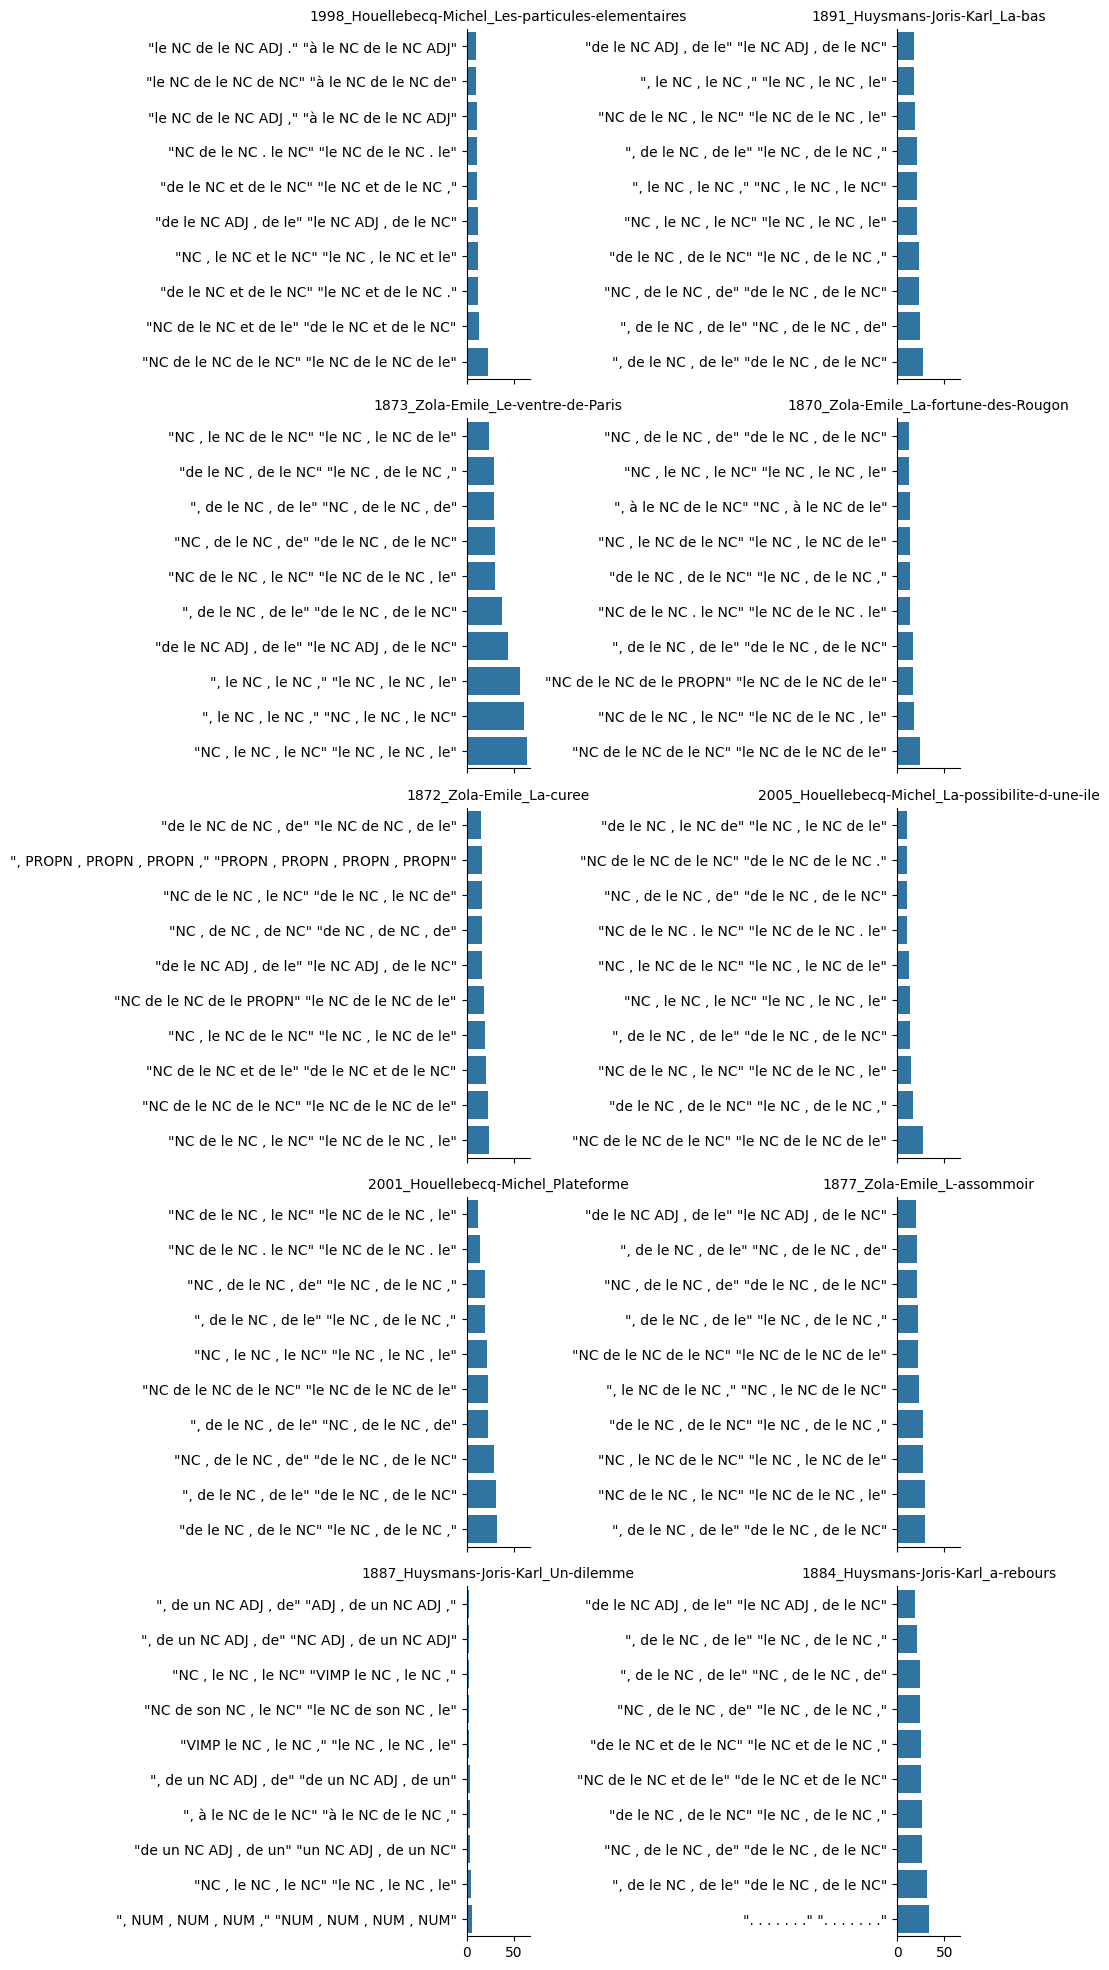

In [10]:
# Plot top cooccurrence at the corpus level
from motifs.plots import facet_bar_plot
facet_bar_plot(cooc)

# Top down

In [11]:
# Within a single text
from motifs.metrics import find_cooccurrent_tokens
tokens = find_cooccurrent_tokens(
    "de le NC , de le NC", data[data.doc == "1884_Huysmans-Joris-Karl_a-rebours"], 10
)
tokens

,token,count
0,"le NC , de le NC PPAS",4
1,"et de le NC , de le",6
2,"le NC et de le NC ,",7
3,"le NC de le NC , de",7
4,"le NC , de le NC ADJ",8
5,"de le NC , de le NC",8
6,de le NC et de le NC,10
7,"le NC , de le NC de",13
8,"le NC , de le NC et",14
9,"le NC , de le NC ,",26


In [13]:
# At the corpus level
from motifs.metrics import corpus_cooccurrent_tokens
cooccurent_tokens = corpus_cooccurrent_tokens("de le NC , de le NC", data, 10)
cooccurent_tokens

,token,count,doc
0,de le NC ; si bien que,2,1998_Houellebecq-Michel_Les-particules-element...
1,"le NC de le NC , de",3,1998_Houellebecq-Michel_Les-particules-element...
2,"il y avoir de le NC ,",3,1998_Houellebecq-Michel_Les-particules-element...
3,de le NC et de le NC,3,1998_Houellebecq-Michel_Les-particules-element...
4,"de le NC , de le NC",3,1998_Houellebecq-Michel_Les-particules-element...
...,...,...,...
88,"de le NC , de le NC",8,1884_Huysmans-Joris-Karl_a-rebours
89,de le NC et de le NC,10,1884_Huysmans-Joris-Karl_a-rebours
90,"le NC , de le NC de",13,1884_Huysmans-Joris-Karl_a-rebours
91,"le NC , de le NC et",14,1884_Huysmans-Joris-Karl_a-rebours


/Users/brunospilak/miniconda3/envs/pymotifs/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


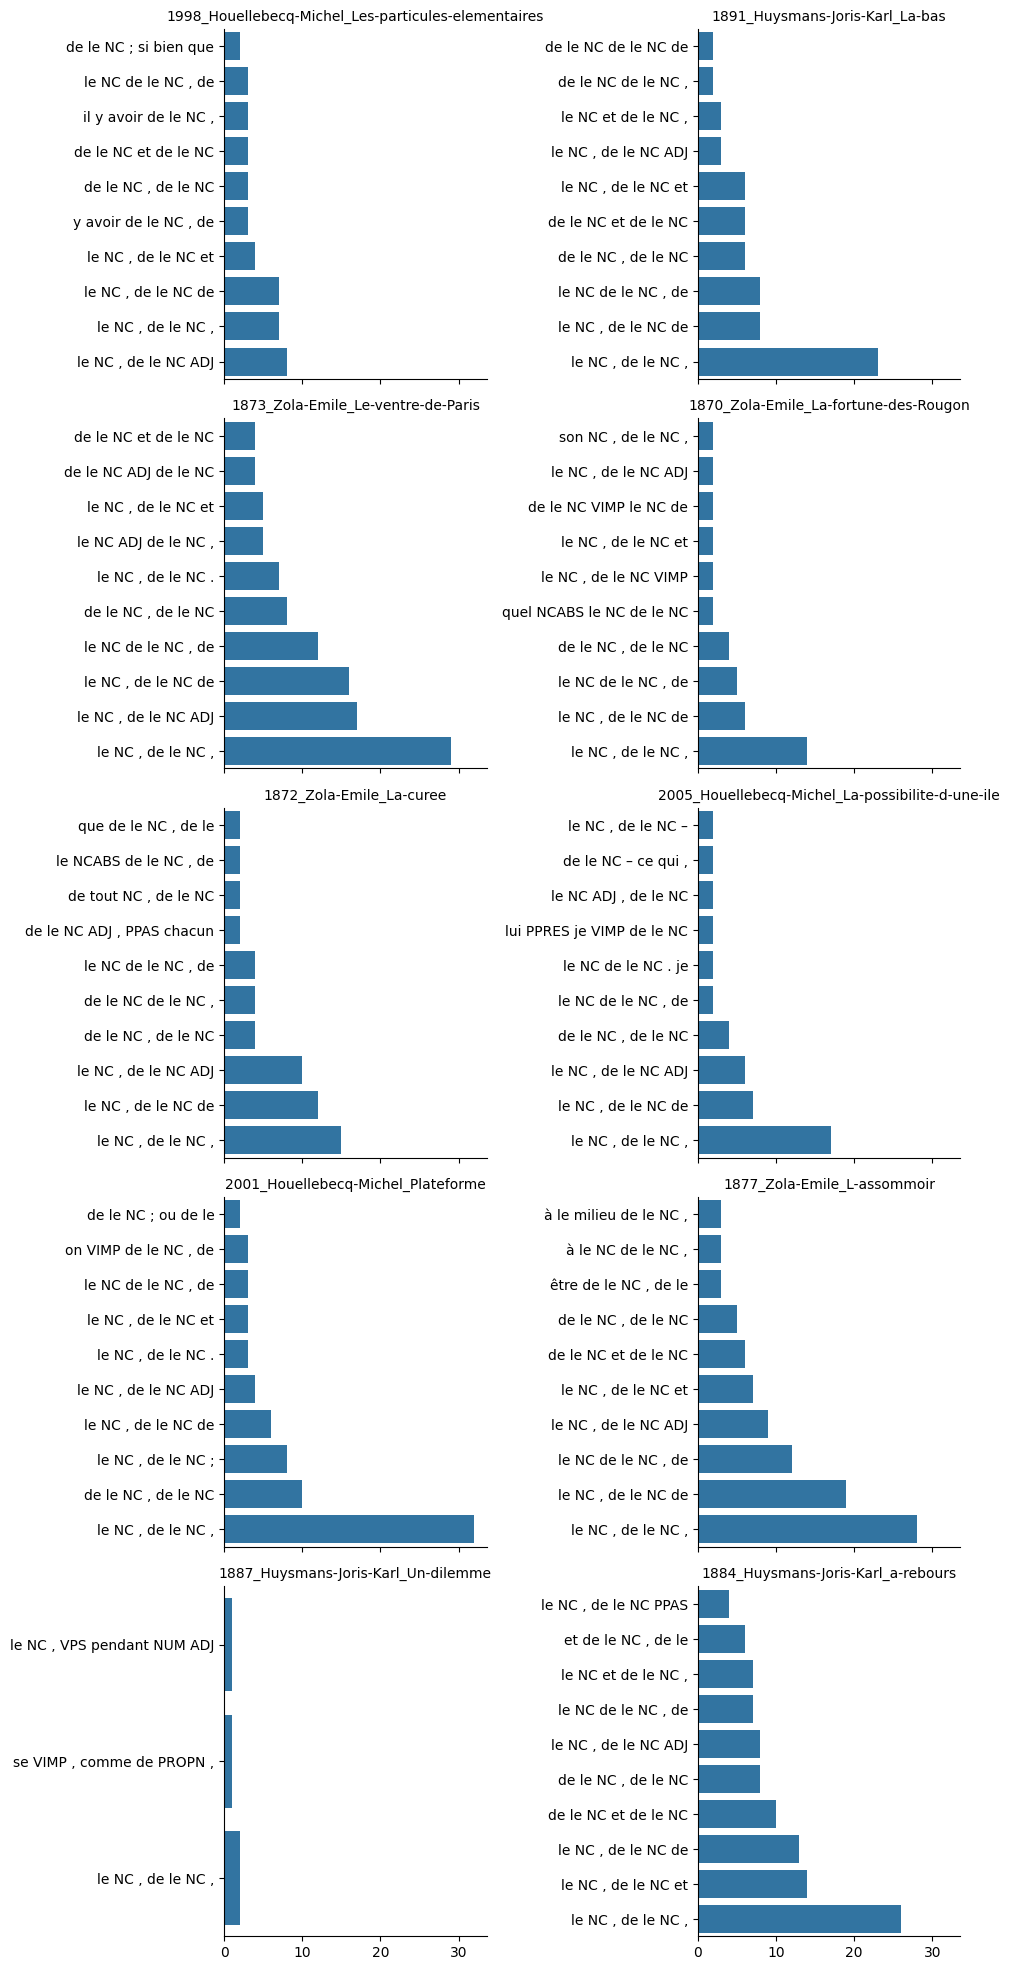

In [14]:
# Plot cooccurrent tokens for a specific tokens at the corpus level
facet_bar_plot(cooccurent_tokens)